In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Graph:
    def __init__(self):
        self.adjlist = dict()
        self.g = nx.Graph()
        
    def addedge(self, u, v, w):
        if u in self.adjlist:
            self.adjlist[u][v] = w
        else:
            self.adjlist[u] = {v:w}
            
        if v in self.adjlist:
            self.adjlist[v][u] = w
        else:
            self.adjlist[v] = {u:w}
            
        self.g.add_edge(u, v, wt=w)
        
    def visualize(self): 
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=500, alpha=0.8)
        edge_labels = nx.get_edge_attributes(self.g, "wt")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels=edge_labels)
        plt.show()
    
    def visualizepath(self, path):
        edges = []
        
        for i in range(len(path)-1):
            edges.append((path[i], path[i+1]))

        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=500, alpha=0.8)
        nx.draw_networkx_nodes(self.g, pos=pos, nodelist=path, node_color='g')
        nx.draw_networkx_edges(self.g, pos, edgelist=edges, width=3, edge_color='b', alpha=1)
        edge_labels = nx.get_edge_attributes(self.g, "wt")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels=edge_labels)
        plt.show()

In [3]:
class PQueue:
    def __init__(self):
        self.queue = []
        
    def isEmpty(self):
        return len(self.queue) == 0
    
    def enqueue(self, ele, pri):
        self.queue.append((ele, pri))
    
    def dequeuemin(self):
        if self.isEmpty():
            return None, None
        
        self.queue.sort(key=lambda x:x[1])
        
        ele, pri = self.queue.pop(0)
        
        return ele, pri
    
    def dequeuemax(self):
        if self.isEmpty():
            return None, None
        
        self.queue.sort(key=lambda x:x[1])
        
        ele, pri = self.queue.pop(-1)
        
        return ele, pri

In [4]:
def bestfirst(graph, heuristic, start, goal):
    q = PQueue()
    q.enqueue((start, [start]), heuristic[start])
    
    while not q.isEmpty():
        ele, pri = q.dequeuemin()
        
        if ele == None:
            return None
        
        node, path = ele
        
        if node in goal:
            return path
        
        for neighbour in graph.adjlist[node]:
            if neighbour not in path:
                new_path = path[:]
                new_path.append(neighbour)
                q.enqueue((neighbour, new_path), heuristic[neighbour])
    
    return None, None

Enter the number of edges in the graph: 14
Enter the edges of the graph in the format (u, v, weight): 
A B 6
A F 3
B C 3
B D 2
C D 1
C E 5
D E 8
E I 5
E J 5
J I 3
F H 7
F G 1
G I 3
I H 2


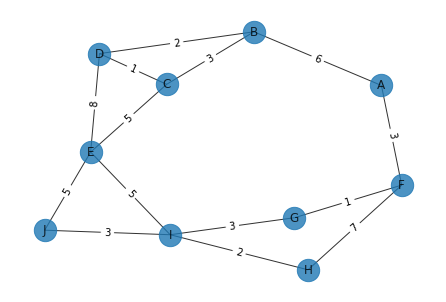

In [5]:
edges = int(input('Enter the number of edges in the graph: '))

g = Graph()

print('Enter the edges of the graph in the format (u, v, weight): ')

for _ in range(edges):
    u, v, w = tuple(input().split(' '))
    w = int(w)
    g.addedge(u, v, w)
    
g.visualize()

In [6]:
start = input('Enter the start node: ')
goal = list(input('Enter the goal node(s): ').split(' '))

heu = dict() 
print('Enter the heuristic values for the nodes: ')
for node in g.adjlist.keys():
    heu[node] = int(input(f'{node}: '))

Enter the start node: A
Enter the goal node(s): J
Enter the heuristic values for the nodes: 
A: 10
B: 8
F: 6
C: 5
D: 7
E: 3
I: 1
J: 0
H: 3
G: 5


In [13]:
path = bestfirst(g, heu, start, goal)

Path from A to ['J'] is: ['A', 'F', 'H', 'I', 'J']


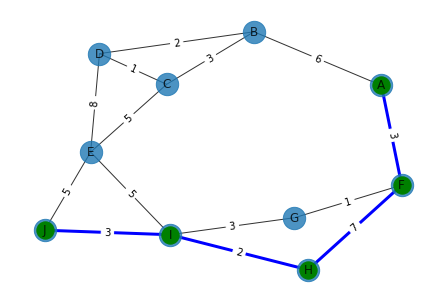

In [14]:
if path == (None, None):
    print('Path to goal does not exist')
else:
    print(f'Path from {start} to {goal} is: {path}')
    g.visualizepath(path)